# 2022 NZMSA Data Science Submission.

In [36]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

%matplotlib inline

# Exploratory Data Analysis.

In [37]:
# Read and display dataset
ds = pd.read_csv("weather-data.csv")
ds.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [38]:
ds.columns

Index([' station', 'valid', 'tmpc', 'dwpc', 'relh', 'sknt', 'gust',
       'peak_wind_drct'],
      dtype='object')

In [39]:
# Rename columns to more readable names
# ds.columns.values[0:8] = ["Station", "Date and Time", "Temp of Env (°C)", "Temp of dew point (°C)",
# "Relative Humidity of Env (%)", "Wind Speed (knots)", "Wind Gust (knots)", "Peak Wind Direction"]

# Get general statistics of the dataset
ds.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [40]:
# Check for null values and examine data types
ds.info()

ds.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


 station           object
valid              object
tmpc              float64
dwpc              float64
relh              float64
sknt              float64
gust              float64
peak_wind_drct    float64
dtype: object

In [41]:
# Convert 'Date and Time' column to datetime type
# ds['Date and Time'] = pd.to_datetime(ds['Date and Time'])
ds['valid'] = pd.to_datetime(ds['valid'])
ds.dtypes

 station                  object
valid             datetime64[ns]
tmpc                     float64
dwpc                     float64
relh                     float64
sknt                     float64
gust                     float64
peak_wind_drct           float64
dtype: object

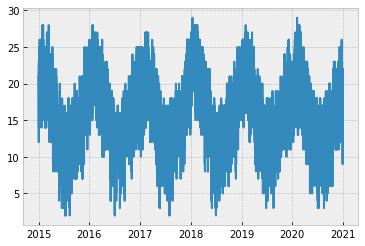

In [42]:
# plot change in temperature over time
plt.plot(ds['valid'], ds['tmpc'])

In [44]:
# Rename columns to more readable names
# ds.columns.values[0:8] = ["Station", "Date and Time", "Temp of Env (°C)", "Temp of dew point (°C)", 
# "Relative Humidity of Env (%)", "Wind Speed (knots)", "Wind Gust (knots)", "Peak Wind Direction"]

ds.columns = ["Station", "Date and Time", "Temp of Env (°C)", "Temp of dew point (°C)", 
"Relative Humidity of Env (%)", "Wind Speed (knots)", "Wind Gust (knots)", "Peak Wind Direction"]

ds.head()

,Station,Date and Time,Temp of Env (°C),Temp of dew point (°C),Relative Humidity of Env (%),Wind Speed (knots),Wind Gust (knots),Peak Wind Direction
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


<AxesSubplot:>

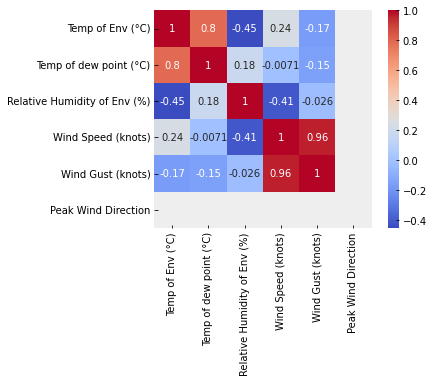

In [45]:
# Correlation plot of dataset
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(ds.corr(), cmap='coolwarm', annot=True, square=True)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Ownert\AppData\Local\Temp\ipykernel_4940\2343204137.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



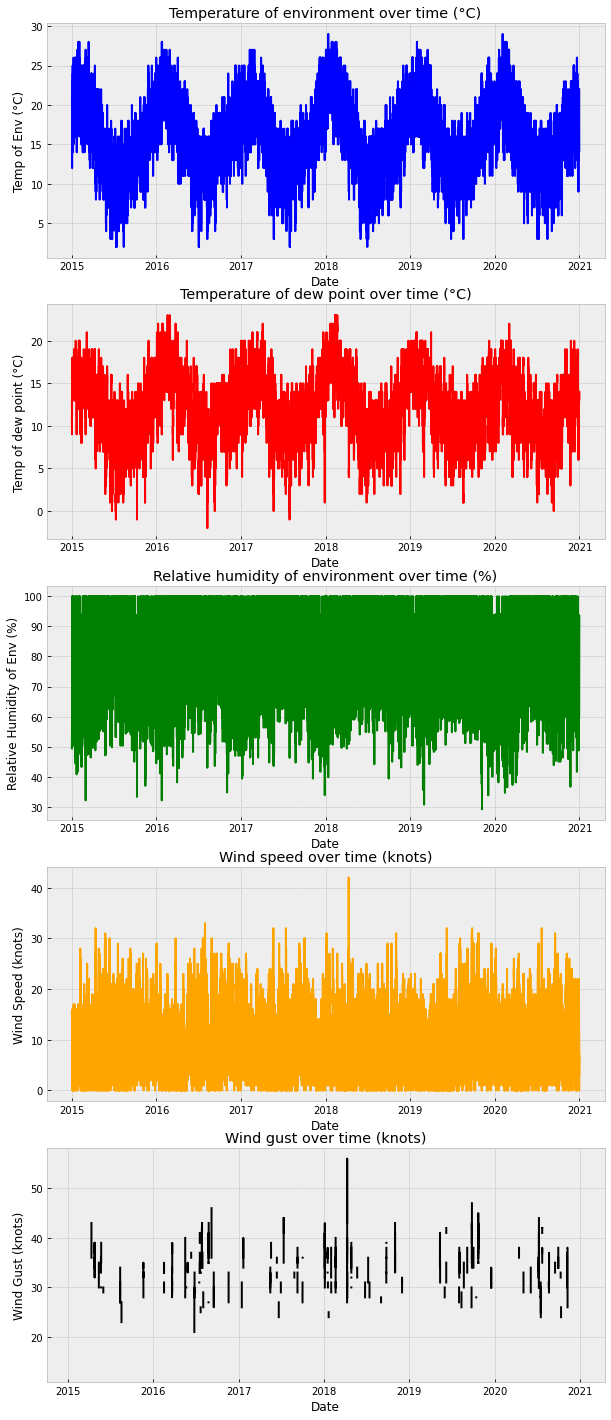

In [46]:
# multigraph to visual change of any numerical sections over time as part of EDA

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(ds["Date and Time"], ds["Temp of Env (°C)"], color="blue")
ax1.set_title("Temperature of environment over time (°C)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temp of Env (°C)")

ax2.plot(ds["Date and Time"], ds["Temp of dew point (°C)"], color="red")
ax2.set_title("Temperature of dew point over time (°C)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temp of dew point (°C)")

ax3.plot(ds["Date and Time"], ds["Relative Humidity of Env (%)"], color="green")
ax3.set_title("Relative humidity of environment over time (%)")
ax3.set_xlabel("Date")
ax3.set_ylabel("Relative Humidity of Env (%)")

ax4.plot(ds["Date and Time"], ds["Wind Speed (knots)"], color="orange")
ax4.set_title("Wind speed over time (knots)")
ax4.set_xlabel("Date")
ax4.set_ylabel("Wind Speed (knots)")

ax5.plot(ds["Date and Time"], ds["Wind Gust (knots)"], color="black")
ax5.set_title("Wind gust over time (knots)")
ax5.set_xlabel("Date")
ax5.set_ylabel("Wind Gust (knots)")

fig.set_size_inches(10,25)
fig.show()

# Data Processing

In [ ]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

In [48]:
# neural prophet expects only 2 columns of data passed in: 'ds' (representing the dates), and 'y' (represents the value we are trying to predict - Temperature of Env)

# hence we create a new dataset using only those columns and renaming them as required

# npdataset = ds[["valid", "tmpc"]]
npdataset = ds[["Date and Time", "Temp of Env (°C)"]]
npdataset.dropna(inplace=True)
npdataset.columns = ['ds', 'y']

npdataset.head(10)

KeyError: "None of [Index(['valid', 'tmpc'], dtype='object')] are in the [columns]"

In [14]:
m = NeuralProphet()
model = m.fit(npdataset)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.388% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 57


  0%|          | 0/175 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.88E-02, min: 2.21E+00


  0%|          | 0/175 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.88E-02, min: 1.55E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.24E-02
Epoch[57/57]: 100%|██████████| 57/57 [01:39<00:00,  1.75s/it, SmoothL1Loss=0.00489, MAE=1.62, RMSE=2.07, RegLoss=0]


In [15]:
future = m.make_future_dataframe(npdataset, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.388% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
WARNING - (py.warnings._showwarnmsg) - c:\Users\Ownert\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2020-12-31 00:00:00,None,21.776518,NaN,16.079824,3.382678,-0.059969,2.373983
1,2020-12-31 00:30:00,None,21.956131,NaN,16.079849,3.383782,-0.057390,2.549891
2,2020-12-31 01:00:00,None,22.094074,NaN,16.079872,3.384887,-0.054887,2.684201
3,2020-12-31 01:30:00,None,22.187595,NaN,16.079895,3.385992,-0.052466,2.774173
4,2020-12-31 02:00:00,None,22.230503,NaN,16.079920,3.387098,-0.050134,2.813619


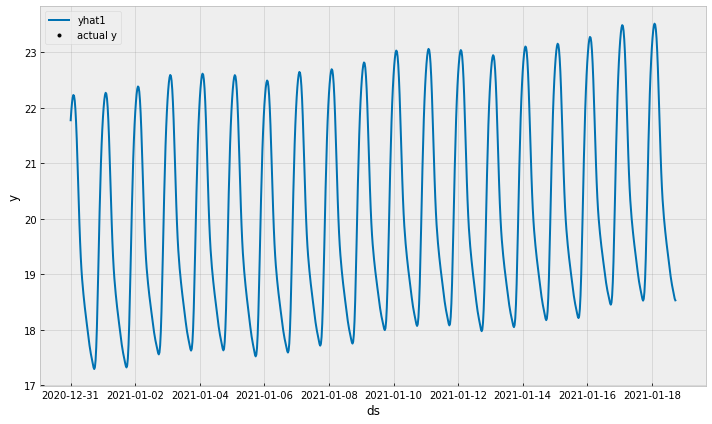

In [16]:
plot1 = m.plot(forecast)

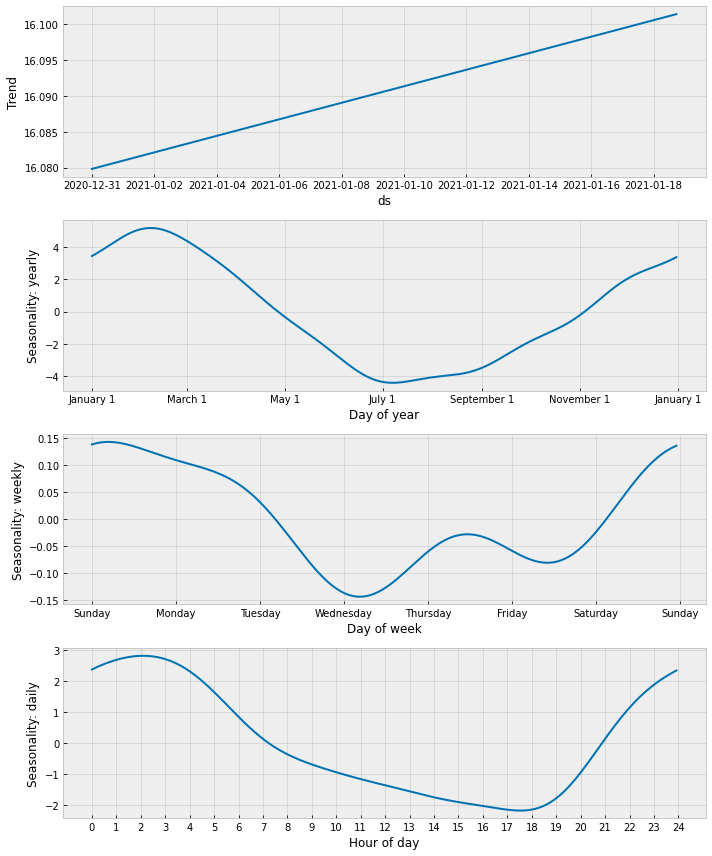

In [17]:
plt2 = m.plot_components(forecast)

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.